<h3>TP 1: Régression Linéaire<h3>

**1)Définition du ptoblème:**  
Estimation de la droite associée à la direction du mouvement du piéton ie.  
Prédire la valeur de y en fonction de x: y=f(x) --> un problème de régression.

In [ ]:
"""
Name : tp_1.py
Author : Chayma Zatout
Contact : github.com/ChaymaZatout
"""
from PIL import Image
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [ ]:
# get images path:
def get_paths(path):
    imgs = []
    import os
    for file in os.listdir(path):
        if file.endswith(".png"): #consider png files
            imgs.append(os.path.join(path, file))
    return imgs

In [ ]:
# compute the index of the lowest white pixel:
def pretraitement(path):
    img = Image.open(path) # Read image
    img = np.array(img) # convert into numpy array

    result = np.where(img == 255) # get all white pixels
    rows = result[0] 
    columns = result[1]
    y = np.max(rows) # get the lowest pixel
    x = columns[np.argmax(rows)] # get x
    return x, y

In [ ]:
# construct the dataset from a given directory:
def get_data(path):
    imgs = get_paths(path)# get all images
    yy = []
    xx = []

    for img in imgs:
        x, y = pretraitement(img)
        xx.append(x)
        yy.append(y)
    return np.array(xx), np.array(yy)

**2) Préparation de données:**  
A partir des images, nous allons:  
- repérer le pixel blanc le plus bas.  
- récupérer les indices x, y
- construit le dataset  
  
PS: la partitionnement en ensemble d'apprentissage/test est mentionné dans l'énoncé

In [ ]:
x, y = get_data("./dataset/train/") 
x = x.reshape(-1, 1)

**3) Sélection du modèle:**  
Nous allons choisir la régression linéaire:

In [ ]:
"""Afin d'exploiter la notion de training set et testing set, j'ai fait appel à la fonction
train test split de sklearn """
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0)
model = LinearRegression()
model.fit(train_x, train_y)
print('Coefficients: ', model.coef_)

Coefficients:  [-0.42219704]


**4) Evaluation du modele sur l'ensemble d'apprentissage**  

In [ ]:
y_pred = model.predict(x)
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
print('Coefficient of determination: %.2f\n' % r2_score(y, y_pred))

Mean squared error: 3.21
Coefficient of determination: 0.99



**5) Visualisation et Interprétation**  

<IPython.core.display.Javascript object>


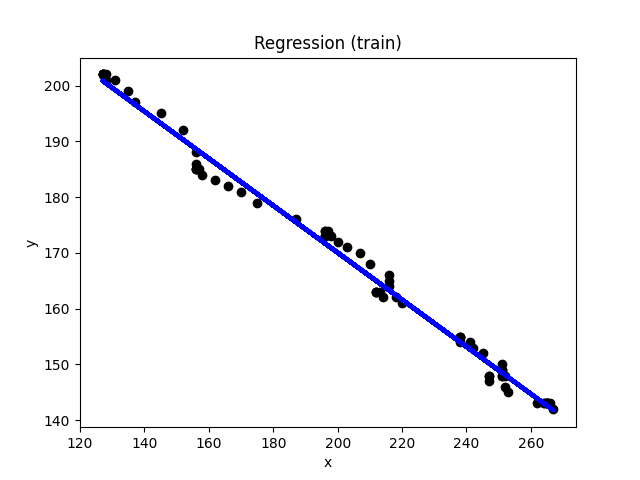

In [ ]:
plt.scatter(x, y, color='black')
plt.plot(test_x, y_pred, color='blue', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression (train)')
plt.show()